# Time Series Segmentation
In this notebook, we evaluate the WSS algorithms

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

from scipy.stats import wilcoxon

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
from aeon.visualisation import plot_critical_difference

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../")

from tqdm import tqdm


In [ ]:
df = pd.read_csv('../experiments/results/ad_results-.csv')



In [ ]:
#df

,dataset,method,predicted_value,predicted_value*2,predicted_value/2,ground_truth_value,mae,mae*2,mae/2,min_mae,top_mae
0,Adiac,FFT,22,44,11.0,22.0210,2.100000e-02,21.9790,11.0210,2.100000e-02,2.100000e-02
1,ArrowHead,FFT,31,62,15.5,62.8340,3.183400e+01,0.8340,47.3340,8.340000e-01,3.183400e+01
2,Beef,FFT,58,116,29.0,117.0190,5.901900e+01,1.0190,88.0190,1.019000e+00,5.901900e+01
3,BirdChicken,FFT,42,84,21.0,129.5665,8.756650e+01,45.5665,108.5665,4.556650e+01,8.756650e+01
4,CBF,FFT,32,64,16.0,32.0000,1.776357e-14,32.0000,16.0000,1.776357e-14,1.776357e-14
5,Car,FFT,18,36,9.0,36.0020,1.800200e+01,0.0020,27.0020,2.000000e-03,1.800200e+01
6,Chinatown,FFT,24,48,12.0,24.0030,3.000000e-03,23.9970,12.0030,3.000000e-03,3.000000e-03
7,CinCECGTorso,FFT,199,398,99.5,205.0000,6.000000e+00,193.0000,105.5000,6.000000e+00,6.000000e+00
8,Coffee,FFT,35,70,17.5,36.0000,1.000000e+00,34.0000,18.5000,1.000000e+00,1.000000e+00
9,Crop,FFT,22,44,11.0,23.0160,1.016000e+00,20.9840,12.0160,1.016000e+00,1.016000e+00


In [ ]:
# Reshape the DataFrame
df_rmse = df.pivot(index='dataset', columns='method', values='top_mae').reset_index()
df_rmse

method,dataset,ACF,Autoperiod,FFT,MWF,RobustPeriod,SuSS
0,Adiac,11.0210,2.100000e-02,2.100000e-02,0.0210,18.0210,0.0210
1,ArrowHead,31.3340,3.083400e+01,3.183400e+01,30.8340,31.8340,30.8340
2,Beef,58.0190,5.601900e+01,5.901900e+01,0.0190,110.0190,51.0190
3,BirdChicken,2.0665,8.556650e+01,8.756650e+01,60.5665,86.5665,81.5665
4,CBF,16.0000,1.776357e-14,1.776357e-14,23.0000,311.0000,4.0000
5,Car,18.0020,1.800200e+01,1.800200e+01,18.0020,18.0020,12.0020
6,Chinatown,12.0030,3.000000e-03,3.000000e-03,16.0030,0.0030,0.0030
7,CinCECGTorso,207.5000,3.000000e+01,6.000000e+00,64.0000,195.0000,99.0000
8,Coffee,18.0000,0.000000e+00,1.000000e+00,27.0000,32.0000,6.0000
9,Crop,0.0160,1.600000e-02,1.016000e+00,0.0160,11.0160,28.9840


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dataset       58 non-null     object 
 1   ACF           58 non-null     float64
 2   Autoperiod    58 non-null     float64
 3   FFT           58 non-null     float64
 4   MWF           58 non-null     float64
 5   RobustPeriod  58 non-null     float64
 6   SuSS          58 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.3+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

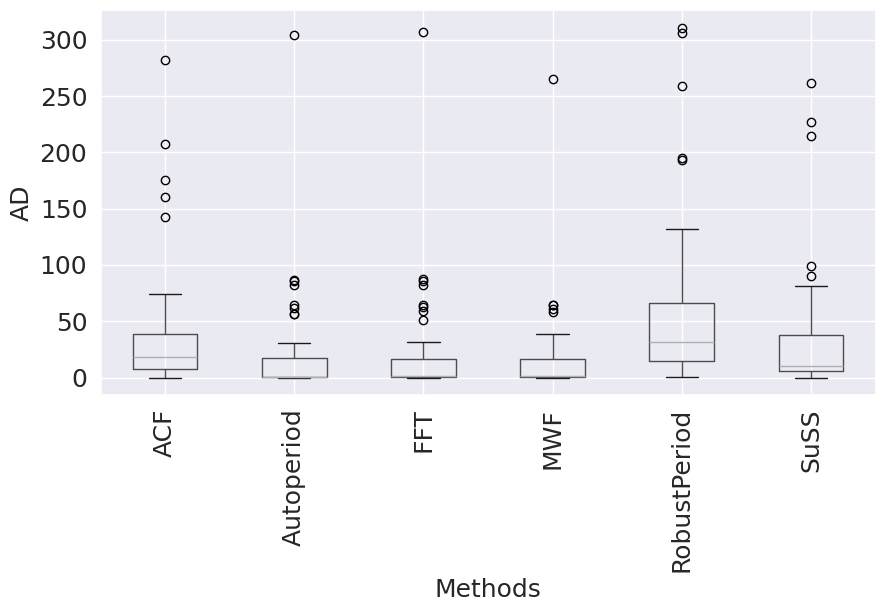

In [ ]:
df_rmse.info()
fontsize = 18
# Create the plot
_, ax = plt.subplots(figsize=(10, 5))
df_rmse.boxplot(ax=ax, rot=90)

# Set labels and their font sizes
ax.set_ylabel("AD", fontsize=fontsize)
ax.set_xlabel("Methods", fontsize=fontsize)

# Adjust tick label font sizes using tick_params
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

#plt.yscale("log")
plt.savefig("Boxplot.pdf",  bbox_inches='tight')


# Show the plot
plt.show()



In [ ]:
import pandas as pd

# 1) Identify numeric-only columns
numeric_cols = df_rmse.select_dtypes(include='number').columns

# 2) Prepare a list to accumulate
outlier_rows = []

# 3) Loop through each numeric column
for col in numeric_cols:
    Q1 = df_rmse[col].quantile(0.25)
    Q3 = df_rmse[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 4) Boolean mask of outliers
    mask = (df_rmse[col] < lower) | (df_rmse[col] > upper)

    # 5) For each outlier, record: index, dataset, metric name, value
    for idx, val in df_rmse.loc[mask, col].items():
        outlier_rows.append({
            'index': idx,
            'dataset': df_rmse.at[idx, 'dataset'],
            'metric': col,
            'value': val
        })

# 6) Build a DataFrame of all outliers
outliers_df = pd.DataFrame(outlier_rows)

# 7) Display it
print(outliers_df)


    index                dataset        metric     value
0       7           CinCECGTorso           ACF  207.5000
1      13          DodgerLoopDay           ACF  282.4280
2      19               FaceFour           ACF  175.5055
3      31             Lightning7           ACF  159.9940
4      42               OliveOil           ACF  142.5005
5       2                   Beef    Autoperiod   56.0190
6       3            BirdChicken    Autoperiod   85.5665
7      19               FaceFour    Autoperiod  304.0055
8      24                    Ham    Autoperiod   81.9970
9      26                Herring    Autoperiod   64.0050
10     32                 Mallat    Autoperiod   87.0010
11     47              ShapesAll    Autoperiod   62.0070
12     49  SonyAIBORobotSurface2    Autoperiod   56.7565
13      2                   Beef           FFT   59.0190
14      3            BirdChicken           FFT   87.5665
15     19               FaceFour           FFT  307.0055
16     24                    Ha

In [ ]:
# 1) Rename columns so they match
outlier_flag = outliers_df.rename(columns={'metric':'method'})

# 2) Merge a flag into your full df
df_full = df.merge(
    outlier_flag.assign(is_outlier=True)[['dataset','method','is_outlier']],
    on=['dataset','method'],
    how='left'
).fillna({'is_outlier': False})


<ipython-input-35-ef5de0bd4c22>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna({'is_outlier': False})


Let's calculate the mean/median/std score.

In [ ]:
df_rmse.iloc[:,1:].mean(axis=0).sort_values(ascending=True).round(3)

,0
method,
MWF,15.114
Autoperiod,17.148
FFT,17.733
SuSS,32.294
ACF,36.555
RobustPeriod,57.389


In [ ]:
df_rmse.iloc[:,1:].median(axis=0).sort_values(ascending=True).round(3)

,0
method,
Autoperiod,0.007
FFT,1.000
MWF,1.001
SuSS,10.000
ACF,18.001
RobustPeriod,31.917


In [ ]:
df_rmse.iloc[:,1:].std(axis=0).sort_values().round(3)

,0
method,
MWF,37.557
Autoperiod,45.067
FFT,45.232
ACF,54.162
SuSS,54.258
RobustPeriod,70.967


Let's compute the wins per method.

In [ ]:
ranks = df_rmse.iloc[:,1:].rank(1, method='min', ascending=True)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [ ]:
for mean, name in zip(means[args], df_rmse.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

Autoperiod:wins=41 rank=1.7
MWF:wins=27 rank=2.2
FFT:wins=23 rank=2.5
ACF:wins=10 rank=3.6
SuSS:wins=11 rank=3.7
RobustPeriod:wins=6 rank=4.8


In [ ]:
# Count how many methods have rank 1 in each row
ties_per_row = (ranks == 1).sum(axis=1)

# Count how many times there are ties
num_ties = (ties_per_row > 1).sum()

print(f"Number of rows with ties: {num_ties}")

Number of rows with ties: 35


Let's plot the CD diagram.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

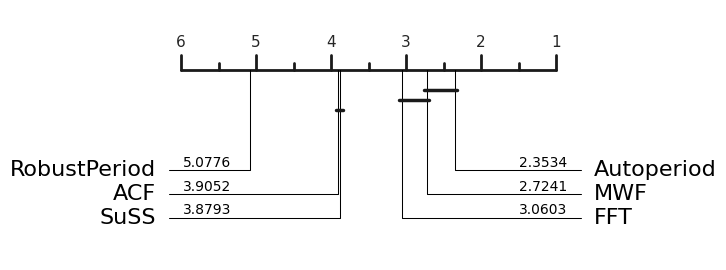

In [ ]:
fig,ax, p_values = plot_critical_difference(
    scores=df_rmse.iloc[:, 1:].to_numpy(),
    labels=df_rmse.columns[1:].to_numpy(),
    correction="holm",
    alpha=0.05,
    lower_better = True,
    return_p_values=True
)


#plt.yscale("log")
plt.savefig("CDD.pdf",  bbox_inches='tight')



# Show the plot
plt.show()


#plt.savefig("../figures/cd_segmentation_comparative.pdf", bbox_inches="tight")

In [ ]:
p_values

array([[1.00000000e+00, 2.41490241e-01, 5.98388080e-03, 1.81053433e-04,
        8.64502438e-05, 1.85562012e-08],
       [0.00000000e+00, 1.00000000e+00, 2.24764927e-01, 9.16753571e-05,
        5.55278156e-05, 9.92131636e-09],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.05576968e-03,
        3.05229533e-04, 5.20489198e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.94146883e-02, 2.41251632e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.07064283e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00]])

In [ ]:
print(df_rmse.columns[1:].to_numpy())

['ACF' 'Autoperiod' 'FFT' 'MWF' 'RobustPeriod' 'SuSS']


Let's compute wins/losses against MWF.

In [ ]:
for rival in df_rmse.columns[1:]:
    if rival == "Autoperiod": continue

    df_pair = df_rmse[["Autoperiod", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)

    wins = pair_ranks[(pair_ranks["Autoperiod"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["Autoperiod"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["Autoperiod"] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"Autoperiod vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

Autoperiod vs ACF: (wins/losses/ties): 40/9/9
Autoperiod vs FFT: (wins/losses/ties): 25/6/27
Autoperiod vs MWF: (wins/losses/ties): 22/10/26
Autoperiod vs RobustPeriod: (wins/losses/ties): 47/4/7
Autoperiod vs SuSS: (wins/losses/ties): 40/12/6


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "MWF":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["MWF"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

          Rival  Wilcoxon_Statistic       p_value
3  RobustPeriod                81.5  9.921316e-09
0           ACF               224.0  5.552782e-05
4          SuSS               293.0  9.167536e-05
2           FFT               301.5  2.247649e-01
1    Autoperiod               301.5  7.585098e-01


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "ACF":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["ACF"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

          Rival  Wilcoxon_Statistic   p_value
3  RobustPeriod               252.5  0.000021
4          SuSS              1086.5  0.980585
1           FFT              1028.5  0.999695
0    Autoperiod               990.0  0.999914
2           MWF              1001.0  0.999944


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "RobustPeriod":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["RobustPeriod"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

        Rival  Wilcoxon_Statistic   p_value
0         ACF              1178.5  0.999979
4        SuSS              1358.5  0.999998
2         FFT              1188.5  1.000000
1  Autoperiod              1250.0  1.000000
3         MWF              1349.5  1.000000


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "Autoperiod":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["Autoperiod"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

          Rival  Wilcoxon_Statistic       p_value
3  RobustPeriod                76.0  1.855620e-08
0           ACF               235.0  8.645024e-05
4          SuSS               297.5  1.810534e-04
1           FFT               121.5  5.983881e-03
2           MWF               226.5  2.414902e-01


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "FFT":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["FFT"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

          Rival  Wilcoxon_Statistic       p_value
3  RobustPeriod                86.5  5.204892e-08
0           ACF               297.5  3.052295e-04
4          SuSS               351.5  1.055770e-03
2           MWF               401.5  7.752351e-01
1    Autoperiod               374.5  9.940161e-01


In [ ]:
# Initialize results DataFrame
wilcoxon_results = []

# Iterate through each rival method
for rival in df_rmse.columns[1:]:
    if rival == "SuSS":
        continue  # Skip self-comparison

    # Get RMSE values for MWF and the rival method
    mwf_rmse = df_rmse["SuSS"]
    rival_rmse = df_rmse[rival]

    # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')

    # Store results in a list
    wilcoxon_results.append([rival, stat, p_value])

# Convert to DataFrame
df_wilcoxon = pd.DataFrame(wilcoxon_results, columns=["Rival", "Wilcoxon_Statistic", "p_value"])

# Sort by p-value (optional)
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

print(df_wilcoxon)

          Rival  Wilcoxon_Statistic   p_value
4  RobustPeriod               237.5  0.000002
0           ACF               566.5  0.019415
2           FFT              1026.5  0.998944
1    Autoperiod              1080.5  0.999819
3           MWF              1138.0  0.999908


In [ ]:
mwf_rmse = df_rmse["Autoperiod"]
rival_rmse = df_rmse["MWF"]
stat, p_value = wilcoxon(mwf_rmse, rival_rmse, alternative='less')
print(p_value)

0.24149024062362834


In [ ]:
from scipy.stats import wilcoxon

# Beispiel für zwei Spalten aus df_rmse
stat, p_manual = wilcoxon(df_rmse.iloc[:, 2], df_rmse.iloc[:, 5], alternative="less")
print(f"Manuell berechneter p-Wert: {p_manual}")
print(f"p-Wert aus plot_critical_difference: {p_values[2,5]}")

Manuell berechneter p-Wert: 1.8556201203188274e-08
p-Wert aus plot_critical_difference: 5.204891981272328e-08


2.4125163154651856e-06
0.01941468831179985
0.9989442303211827
0.9998189465667953
0.9999083246429277


<ipython-input-26-693132d44d75>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_wilcoxon, x="p_value", y="Rival", palette="coolwarm", edgecolor="black")


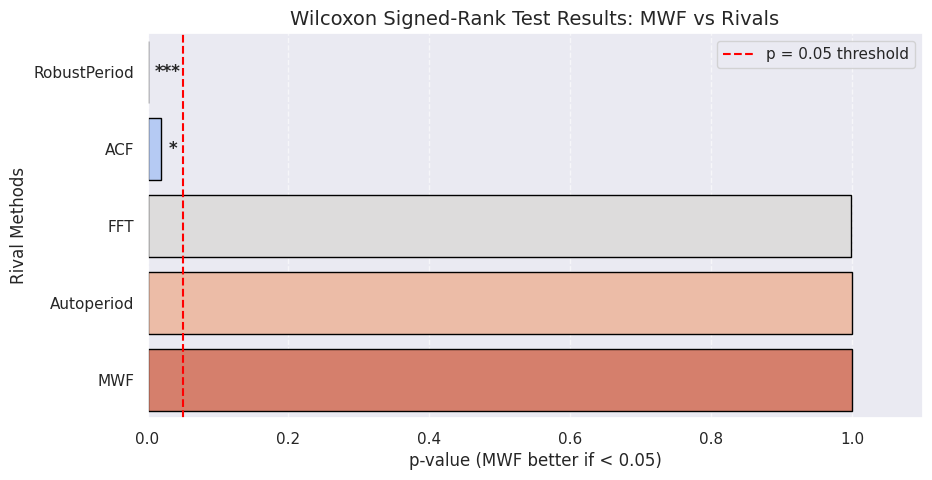

In [ ]:
# Sort data by p-value for better visualization
df_wilcoxon = df_wilcoxon.sort_values(by="p_value", ascending=True)

# Set up figure
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_wilcoxon, x="p_value", y="Rival", palette="coolwarm", edgecolor="black")

# Add significance annotations at correct y-axis positions
for i, (rival, p_val) in enumerate(zip(df_wilcoxon["Rival"], df_wilcoxon["p_value"])):
    print(p_val)
    significance = ""
    if p_val < 0.001:
        significance = "***"  # Highly significant
    elif p_val < 0.01:
        significance = "**"   # Significant
    elif p_val < 0.05:
        significance = "*"    # Weak significance


    # Place text next to the bar at the correct height
    ax.text(p_val + 0.01, i, significance, va='center', fontsize=12, fontweight="bold")

# Labels and styling
plt.axvline(0.05, color='red', linestyle='--', label="p = 0.05 threshold")  # Significance threshold
plt.xlabel("p-value (MWF better if < 0.05)", fontsize=12)
plt.ylabel("Rival Methods", fontsize=12)
plt.title("Wilcoxon Signed-Rank Test Results: MWF vs Rivals", fontsize=14)
plt.legend()
plt.xlim(0, max(df_wilcoxon["p_value"]) + 0.1)  # Adjust x-axis to fit annotations
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [ ]:
p_val

0.9999083246429277

Examples of the results

In [ ]:
# Ensure dataset is numeric by dropping non-numeric columns
df_numeric = df_rmse.drop(columns=["method", "dataset"], errors="ignore").apply(pd.to_numeric, errors='coerce')

# Rank RMSE values row-wise
ranked_df = df_numeric.rank(axis=1, method="min", ascending=True)

# Define the target ranking order
target_ranking = {
     "Autoperiod": 1,
    "MWF": 2,
    "FFT": 3,
    "SuSS": 4,
    "ACF": 5,
    "RobustPeriod": 6
}


# Find a row where ranks match the target order
for index, row in ranked_df.iterrows():
    if all(row[method] == target_ranking[method] for method in target_ranking):
        print("Found matching example at index:", index)
        print(df_rmse.iloc[index])  # Print the full row (including dataset name)
        break
else:
    print("No exact match found in the dataset.")


No exact match found in the dataset.


In [ ]:
ranked_df

method,ACF,Autoperiod,FFT,MWF,RobustPeriod,SuSS
0,5.0,1.0,1.0,1.0,6.0,1.0
1,4.0,1.0,5.0,1.0,5.0,1.0
2,4.0,3.0,5.0,1.0,6.0,2.0
3,1.0,4.0,6.0,2.0,5.0,3.0
4,4.0,1.0,1.0,5.0,6.0,3.0
5,2.0,2.0,2.0,2.0,2.0,1.0
6,5.0,1.0,1.0,6.0,1.0,1.0
7,6.0,2.0,1.0,3.0,5.0,4.0
8,4.0,1.0,2.0,5.0,6.0,3.0
9,1.0,1.0,4.0,1.0,5.0,6.0


In [ ]:
# Ensure RMSE values are numeric
df_numeric = df_rmse.drop(columns=["method", "dataset"], errors="ignore").apply(pd.to_numeric, errors='coerce')

# Rank RMSE values row-wise (1 = lowest RMSE)
ranked_df = df_numeric.rank(axis=1, method="min", ascending=True)

# Define the target ranking order
target_ranking = {
     "Autoperiod": 1,
    "MWF": 2,
    "FFT": 3,
    "SuSS": 4,
    "ACF": 5,
    "RobustPeriod": 6
}

# Compute the ranking distance for each row
ranked_df["rank_distance"] = ranked_df.apply(lambda row: sum(abs(row[method] - target_ranking[method]) for method in target_ranking), axis=1)

# Find the row with the smallest rank distance
best_match_index = ranked_df["rank_distance"].idxmin()

# Print results
print("Closest match found at index:", best_match_index)
print("Dataset name:", df_rmse.loc[best_match_index, "dataset"])
print("RMSE values for this dataset:")
print(df_rmse.iloc[best_match_index])
print("\nRanking distance:", ranked_df.loc[best_match_index, "rank_distance"])

Closest match found at index: 17
Dataset name: EOGVerticalSignal
RMSE values for this dataset:
method
dataset         EOGVerticalSignal
ACF                       39.0005
Autoperiod                 0.0005
FFT                        1.0005
MWF                        0.0005
RobustPeriod              58.0005
SuSS                       8.0005
Name: 17, dtype: object

Ranking distance: 1.0


In [ ]:
ranked_df.loc[[17]]

method,ACF,Autoperiod,FFT,MWF,RobustPeriod,SuSS,rank_distance
17,5.0,1.0,3.0,1.0,6.0,4.0,1.0


In [ ]:
print("Dataset name:", df_rmse.loc[17, "dataset"])

Dataset name: EOGVerticalSignal


In [ ]:
ranked_df.sort_values(by=['rank_distance'])

method,ACF,Autoperiod,FFT,MWF,RobustPeriod,SuSS,rank_distance
17,5.0,1.0,3.0,1.0,6.0,4.0,1.0
54,5.0,1.0,2.0,2.0,6.0,4.0,1.0
57,5.0,1.0,2.0,2.0,6.0,4.0,1.0
52,5.0,1.0,2.0,2.0,6.0,4.0,1.0
40,5.0,1.0,3.0,1.0,6.0,4.0,1.0
41,5.0,1.0,3.0,1.0,6.0,4.0,1.0
36,5.0,1.0,3.0,1.0,6.0,4.0,1.0
39,5.0,1.0,2.0,2.0,6.0,4.0,1.0
56,4.0,1.0,3.0,2.0,6.0,5.0,2.0
16,5.0,1.0,3.0,1.0,6.0,3.0,2.0
